# Data Analysis
Here we go, this is what we've been waiting for. Time to do some analysis!

In [1]:
from os import path
import numpy as np
import pandas as pd
from IPython.display import display

if all([path.exists("data/ready/{}.csv".format(file)) for file in ["AlbumData", "ArtistData", "EnhancedTracksData", "FullTrackData", "TrackFeatureData"]]):
    album_data_df = pd.read_csv("data/ready/AlbumData.csv")
    album_data_df.drop(album_data_df.columns[0], axis=1, inplace=True)
    artist_data_df = pd.read_csv("data/ready/ArtistData.csv")
    artist_data_df.drop(artist_data_df.columns[0], axis=1, inplace=True)
    enhanced_tracks_data_df = pd.read_csv("data/ready/EnhancedTracksData.csv")
    enhanced_tracks_data_df.drop(enhanced_tracks_data_df.columns[0], axis=1, inplace=True)
    full_track_data_df = pd.read_csv("data/ready/FullTrackData.csv")
    full_track_data_df.drop(full_track_data_df.columns[0], axis=1, inplace=True)
    track_feature_data_df = pd.read_csv("data/ready/TrackFeatureData.csv")
    track_feature_data_df.drop(track_feature_data_df.columns[0], axis=1, inplace=True)
    print("Data ready for analysis")
else:
    print("Run feature analysis from other journal before continuing")

/home/jcroderman/.pyenv/versions/3.7.5/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Data ready for analysis


## The Data
Let's explore some of the datasets we have access to:

In [2]:
print(enhanced_tracks_data_df.shape[0])
enhanced_tracks_data_df.head(3)

21161


,id,date,ms_played,artist_ids,duration_ms,total_ms_played,total_times_played,time
0,4hns23kYYZg0BhDwXeDxB1,2020-01-01,680,['54YNxT02JdAApvFBhD8ea0'],499826,5877,0,00:51:00
1,3sLmks6fCY40bBSGDjU4FO,2020-01-01,3282,['5zS6TsJ4lQFUGePSHAXaI9'],459106,466281,1,00:52:00
2,4Saza06xljloZwotqXdNle,2020-01-01,66171,['5fJ4w85NxFXyWlPU9wH6BE'],128000,66171,1,00:52:00


### EnhancedTracksData
This dataset is mostly what we got from spotify, describing the id of the track listened to at what time, and how long it was listened to.
* id - The track ID of the track described (not completely accurate, since Spotify did not provide these ids)
* date - The date listened to the track, starting January 1st and ending October 30th (the day I received the data from Spotify)
* ms_played - How long the specified track was listened to
* artist_ids - The ids of all artists associated with this track
* duration_ms - How long in ms the track lasts
* total_ms_played - This describes the total amount of time spent listening to this track across the full year
* total_times_played - This describes, roughly, how many times the track was listened to (not completely accurate)
* time - The time at the end of the track

In [3]:
print(full_track_data_df.shape[0])
full_track_data_df.head(3)

4863


,id,album_id,album_name,album_release_date,album_total_tracks,artist_ids,artist_names,duration_ms,explicit,name,popularity,genres
0,4hns23kYYZg0BhDwXeDxB1,0Gwu5X7W1mrkSTk2uZ25cv,Blues & Politics,1999-06-29,8,['54YNxT02JdAApvFBhD8ea0'],['Mingus Big Band'],499826,False,Haitian Fight Song,30,"['bebop', 'big band', 'modern big band', 'jazz']"
1,3sLmks6fCY40bBSGDjU4FO,7By1lfK4fTIs2YsMvA0FWH,The Project,2004-01-01,10,['5zS6TsJ4lQFUGePSHAXaI9'],['Andy Martin & Vic Lewis'],459106,False,Everything You Is,0,[]
2,2408a07TNDga6lMlaIFLEU,5gfrrR8BnDgFhqGWcQaWFe,And the Danish Radio Big Band & Eclipse,2013-05-10,22,['6DbqS0X8cSFOPGsvyze2yh'],['Thad Jones'],255466,False,To You,7,"['hard bop', 'jazz trumpet', 'soul jazz', 'big..."


### FullTrackData
This dataset is a listing of all tracks listened to during the year, and the full list of features obtained through Spotify's `tracks` endpoint
* id - The track ID of the track described
* album_id - The ID of the album that the track is on (may not be entirely accurate, this was obtained from a best-guess procedure)
* album_name - The name of the album the track appears on
* album_release_date - The date of release of the album (may not be entirely accurate, some data is only accurate to year, some to month, some to day)
* album_total_tracks - The total number of tracks on the album
* artist_ids - A list of all the ids of artists on the track
* artist_names - A list of names of all the artists on the track
* duration_ms - How long the track lasts in ms
* explicit - If true, song is explicit
* name - Name of the track
* popularity - How popular a track is, based on Spotify's proprietary popularity algorithm
* genres - A list of the approximate genres that the track belongs to (some tracks do not have genre information)

In [4]:
print(track_feature_data_df.shape[0])
track_feature_data_df.head(3)

4863


,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,boringness
0,4hns23kYYZg0BhDwXeDxB1,0.386,0.392,2,-14.123,0,0.0408,0.536,0.794,0.167,0.3990,89.153,4,152.830
1,3sLmks6fCY40bBSGDjU4FO,0.581,0.517,5,-10.203,0,0.0378,0.901,0.794,0.108,0.5530,138.751,4,238.348
2,2408a07TNDga6lMlaIFLEU,0.138,0.110,5,-15.402,1,0.0337,0.945,0.943,0.111,0.0534,61.730,4,71.128


### TrackFeatureData
This dataset is a listing of all tracks listened to during the year, along with all of the features obtained through Spotify's `audio-features` endpoint. This contains data calculated by Spotify with their proprietary algorithms. (Descriptions come directly from Spotify)
* id - The track ID of the track described
* danceability - Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity
* energy - A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy
* key - The key the track is in (0 = C, 1 = C#/Db, etc.)
* loudness - The overall loudness of a track in decibels (dB)
* mode - Indicates the modality (major or minor) of a track (0 = Major, 1 = Minor)
* speechiness - Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value
* instrumentalness - Predicts whether a track contains no vocals
* liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live
* valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive
* tempo - The overall estimated tempo of a track in beats per minute (BPM)
* time_signature - An estimated overall time signature of a track
* boringness - An arbitrary score calculated from an equation from [this article](https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de) that shows how boring a track is

In [5]:
print(album_data_df.shape[0])
album_data_df.head(3)

2681


,id,album_type,artist_ids,artist_names,copyright_texts,genres,image_url,label,name,popularity,release_date,total_tracks
0,0Gwu5X7W1mrkSTk2uZ25cv,album,['54YNxT02JdAApvFBhD8ea0'],['Mingus Big Band'],"['1999 Francis Dreyfus Music SARL, a BMG Compa...",[],https://i.scdn.co/image/ab67616d0000b27315338b...,Dreyfus Jazz,Blues & Politics,27,1999-06-29,8
1,7By1lfK4fTIs2YsMvA0FWH,album,['5zS6TsJ4lQFUGePSHAXaI9'],['Andy Martin & Vic Lewis'],"['2004 Drewbone Music', '2004 Drewbone Music']",[],https://i.scdn.co/image/ab67616d0000b273750e6c...,Drewbone Music,The Project,1,2004-01-01,10
2,5gfrrR8BnDgFhqGWcQaWFe,album,['6DbqS0X8cSFOPGsvyze2yh'],['Thad Jones'],['(C) 2013 Storyville Records'],[],https://i.scdn.co/image/ab67616d0000b2731a5d61...,Storyville,And the Danish Radio Big Band & Eclipse,16,2013-05-10,22


### AlbumData
This dataset is a listing of all albums of the tracks listened to during the year, along with all of the features obtained through Spotify's `album` endpoint.
* id - The album ID of the album described
* album_type - The type of album it is (album, compilation, single) (may not be accurate)
* artist_ids - List of ids of major artists on the album
* artist_names - List of names of major artists on the album
* copyright_texts - Copyrights of the album
* genres - A list of the approximate genres that the track belongs to (some tracks do not have genre information)
* image_url - URL of the album image
* label - Record label of the album
* name - Name of the album
* popularity - Popularity of the album based on Spotify's proprietary popularity algorithm
* release_date - The date of release of the album (may not be entirely accurate, some data is only accurate to year, some to month, some to day)
* total_tracks - The total number of tracks on the album

In [6]:
print(artist_data_df.shape[0])
artist_data_df.head(3)

2204


,id,genres,name,popularity
0,54YNxT02JdAApvFBhD8ea0,"['bebop', 'big band', 'jazz', 'modern big band']",Mingus Big Band,33
1,5zS6TsJ4lQFUGePSHAXaI9,[],Andy Martin & Vic Lewis,0
2,6DbqS0X8cSFOPGsvyze2yh,"['bebop', 'big band', 'contemporary post-bop',...",Thad Jones,41


### ArtistData
This dataset is a listing of all artists of the tracks listened to during the year, along with all of the features obtained through Spotify's `artist` endpoint.
* id - The artist ID of the artist described
* genres - A list of the approximate genres that the track belongs to (some tracks do not have genre information)
* name - Name of the artist
* popularity - Popularity of the artist based on Spotify's proprietary popularity algorithm

## Analysis
Let's do some analysis!

In [7]:
# Setup

import math
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
register_matplotlib_converters()
rcParams['figure.figsize'] = 18.5, 7.5
rcParams['font.size'] = 16

ms_to_minutes = 1000 * 60
ms_to_hours = ms_to_minutes * 60
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [8]:
enhanced_tracks_data_df["month"] = enhanced_tracks_data_df["date"].apply(lambda date: int(date[5:7]))
enhanced_tracks_data_df["day"] = enhanced_tracks_data_df["date"].apply(lambda date: int(date[8:10]))
month_range = [enhanced_tracks_data_df["month"].min(), enhanced_tracks_data_df["month"].max()]
month_range

[1, 10]

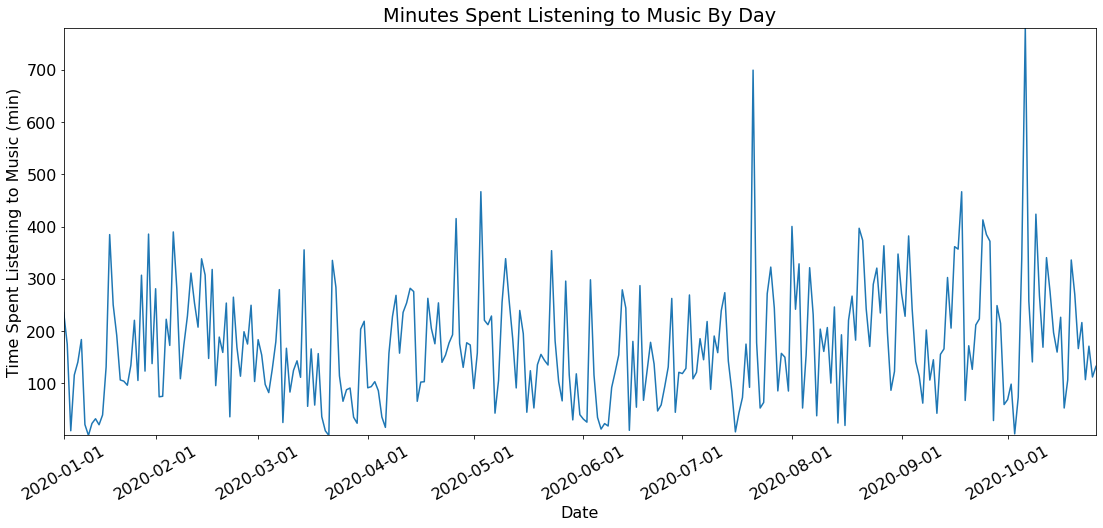

In [9]:
def show_minutes_spent_listening_to_music_by_day(data):
    plt.plot(data[:,0], data[:,1])
    plt.title("Minutes Spent Listening to Music By Day")
    plt.xlabel("Date")
    plt.xticks(["2020-{:02}-01".format(month) for month in range(1, 11)] + ["2020-10-30"])
    plt.xticks(rotation=30)
    plt.ylabel("Time Spent Listening to Music (min)")
    plt.margins(0)

data = enhanced_tracks_data_df[["date", "ms_played"]].groupby(["date"]).sum().apply(lambda x: x / ms_to_minutes).reset_index().to_numpy()
show_minutes_spent_listening_to_music_by_day(data)

plt.show()

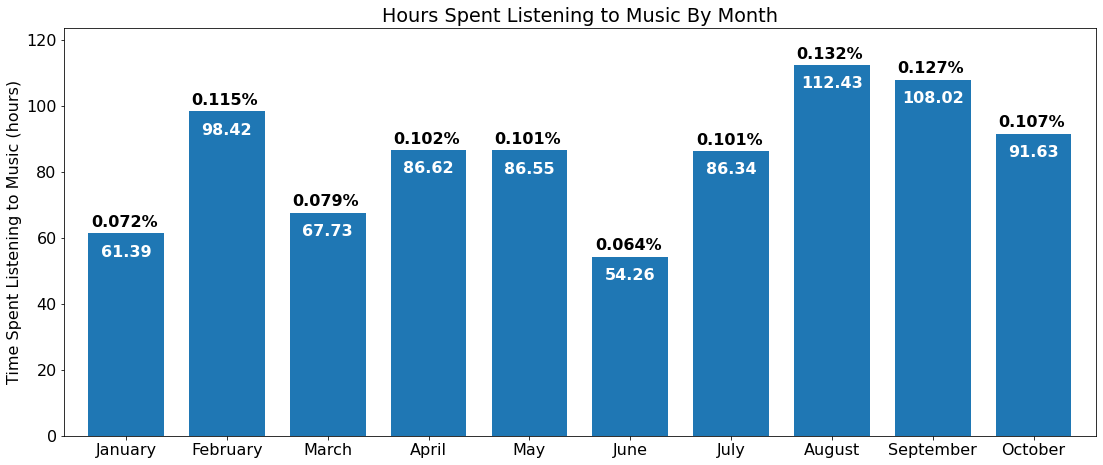

In [10]:
def show_minutes_spent_listening_to_music_by_month(data):
    fig, ax = plt.subplots()
    width = 0.75 # the width of the bars 
    ax.bar(data[:,0], data[:,1], width)
    for i, percentage in enumerate(data[:,2]):
        ax.text(i + 0.65, data[i,1] + 2, "{}%".format(percentage), color='black', fontweight='bold')
    for i, hours in enumerate(data[:,1]):
        ax.text(i + 1, data[i,1] - 7, "{:.2f}".format(hours), color='white', fontweight='bold', horizontalalignment='center')
    
    plt.title("Hours Spent Listening to Music By Month")
    plt.xticks(ticks=range(month_range[0], month_range[1] + 1), labels=months[:month_range[1]])
    plt.ylabel("Time Spent Listening to Music (hours)")
    plt.margins(0.025, 0.1)

ms_to_minutes = 1000 * 60
data = enhanced_tracks_data_df[["month", "ms_played"]].groupby(["month"]).sum().apply(lambda x: x / ms_to_hours).reset_index()
total_hours_listened = data["ms_played"].sum()
data["percentage"] = data.apply(lambda row: "{:.3f}".format(row["ms_played"] / total_hours_listened), axis=1)
data = data.reset_index(drop=True).to_numpy()
show_minutes_spent_listening_to_music_by_month(data)

plt.show()

In [11]:
# enhanced_tracks_data, but only keep songs that have been listened to for at least half their runtime
trimmed_tracks_data_df = enhanced_tracks_data_df[enhanced_tracks_data_df["ms_played"] > (enhanced_tracks_data_df["duration_ms"] / 2)]
trimmed_tracks_data_df.head()

,id,date,ms_played,artist_ids,duration_ms,total_ms_played,total_times_played,time,month,day
2,4Saza06xljloZwotqXdNle,2020-01-01,66171,['5fJ4w85NxFXyWlPU9wH6BE'],128000,66171,1,00:52:00,1,1
4,0rupt7DuLo3WGecL3cyi19,2020-01-01,150773,['2jFZlvIea42ZvcCw4OeEdA'],150773,452199,3,00:55:00,1,1
5,61CNyCHQjU1s9YjZ5WbR7W,2020-01-01,185180,['282SGsed9bWA8Pw1FV8X7S'],354973,1443610,4,01:09:00,1,1
6,5NxC33tgrysAEqc62yukdT,2020-01-01,191360,['73rPcaYEhBd0UuVZBqqyQJ'],191360,1806303,9,13:18:00,1,1
7,2WbKDH7BbDUHqACsZH0KVW,2020-01-01,205322,['7pXu47GoqSYRajmBCjxdD6'],205322,1396769,7,13:21:00,1,1


We'll graph some features now! We'll start by comparing Spotify's data with my data:

In [12]:
graphable_features = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness",
                      "liveness", "valence", "tempo", "loudness", "boringness"]

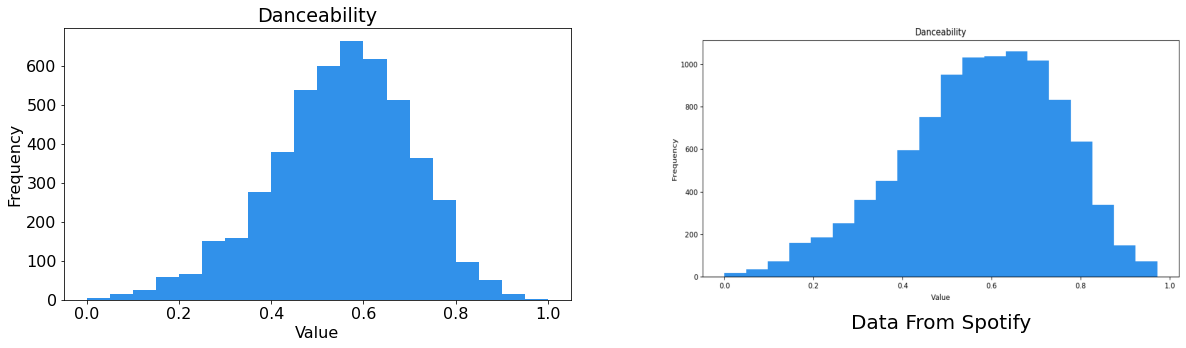

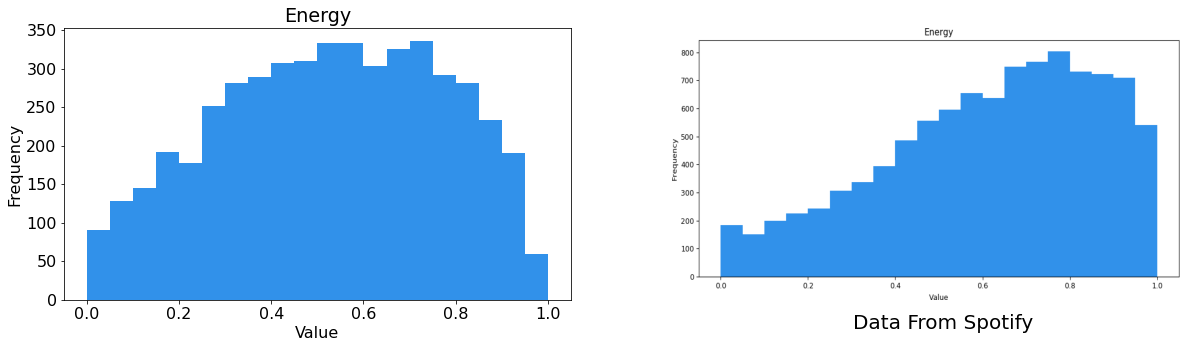

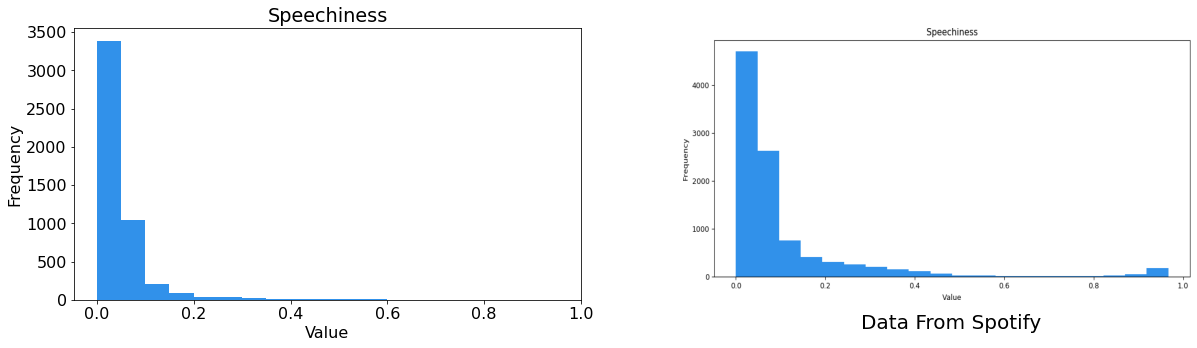

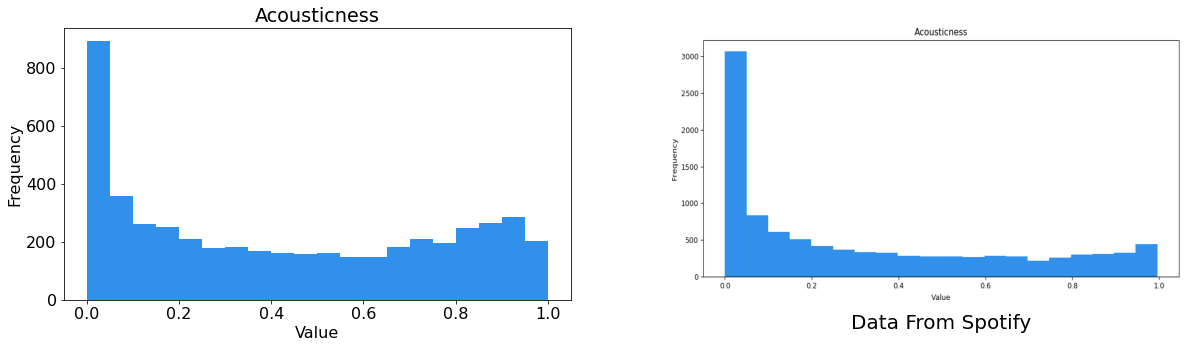

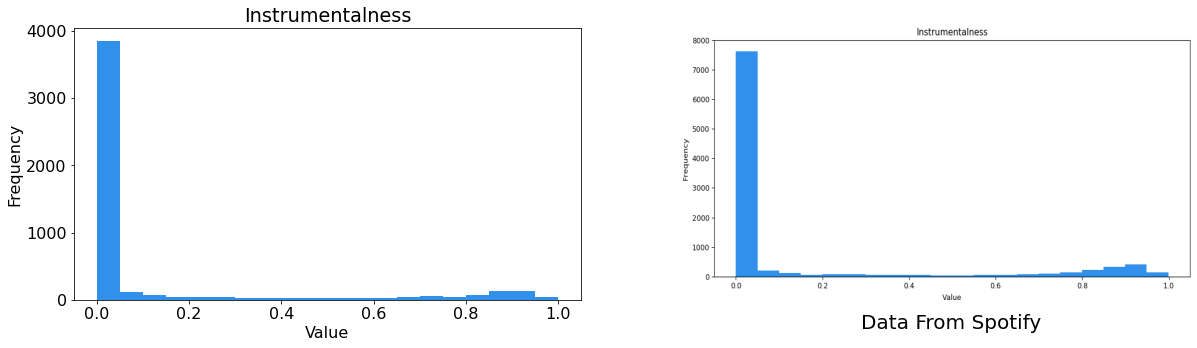

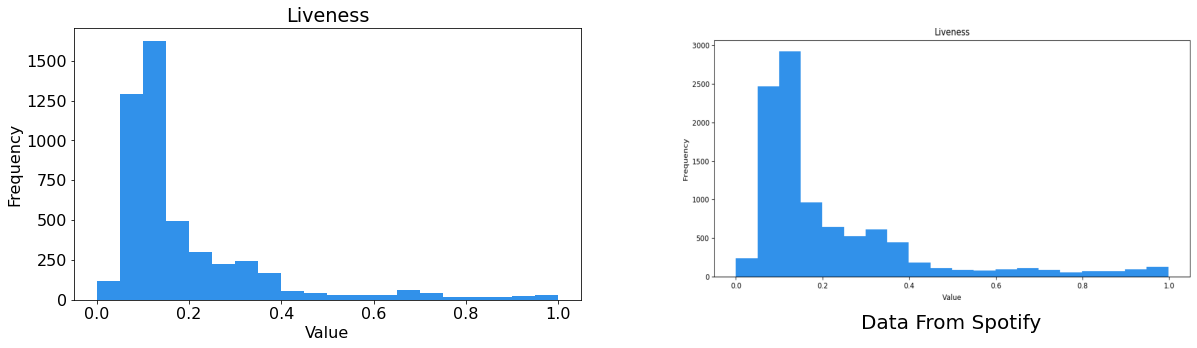

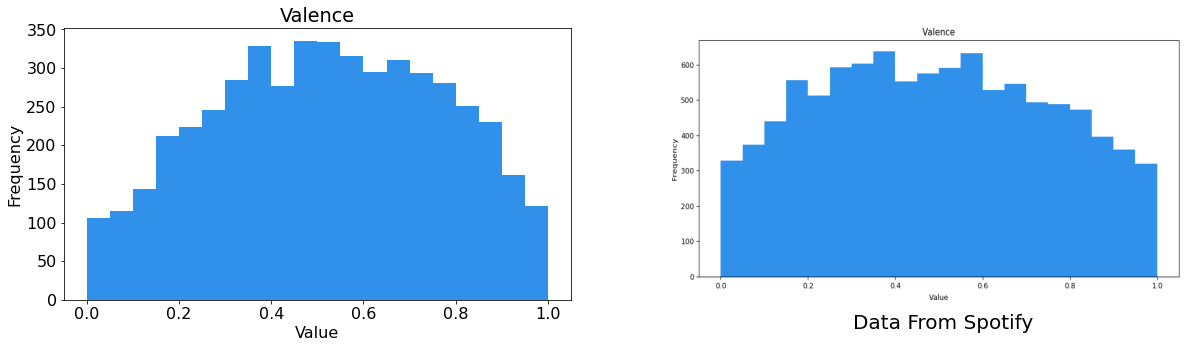

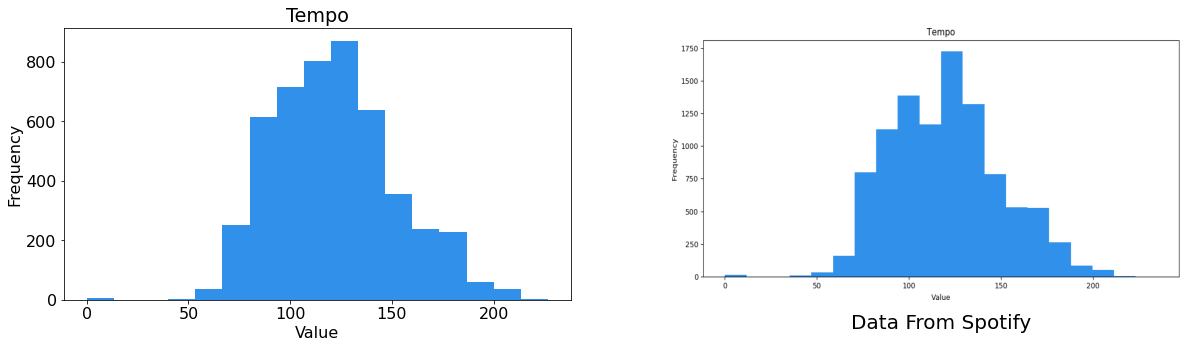

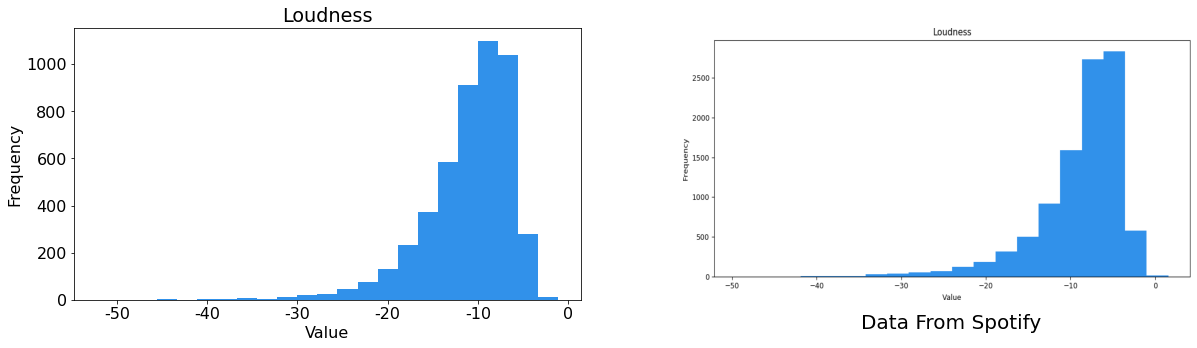

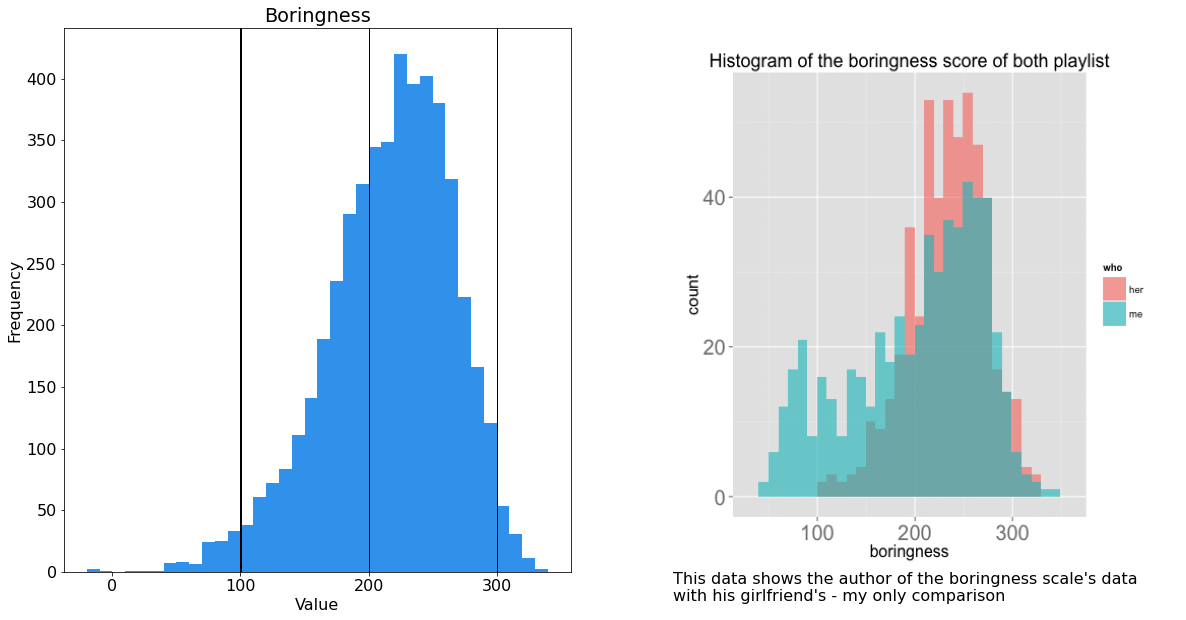

In [13]:
def graph_features(feature):
    def show_features(data):
        fig, ax = plt.subplots(1, 2, figsize=[20, 5] if feature != "boringness" else [20, 10])
        ax[0].bar(data[:,0], data[:,1], 1.0, align="edge" if feature != "loudness" else "center", color="#3191ea")
        img = mpimg.imread('res/' + feature + '.png')
        ax[1].imshow(img, aspect="auto")

        ax[0].set_title(feature[0].upper() + feature[1:])
        if feature == "tempo":
            ax[0].set_xticks([0, 3.75, 7.5, 11.25, 15])
            ax[0].set_xticklabels([0, 50, 100, 150, 200])
        elif feature == "loudness":
            ax[0].set_xticks([-22.5, -18, -13.5, -9, -4.5, 0])
            ax[0].set_xticklabels([-50, -40, -30, -20, -10, 0])
        elif feature == "boringness":
            ax[0].set_xticks([0, 10, 20, 30, 40])
            ax[0].set_xticklabels([0, 100, 200, 300, 400])
        else:
            ax[0].set_xticks([0, 4, 8, 12, 16, 20])
            ax[0].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax[0].set_xlabel("Value")
        ax[0].set_ylabel("Frequency")

        ax[1].axis("off")
        
        if feature == "boringness":
            ax[0].axvspan(10, 10.01, color="black", zorder=1)
            ax[0].axvspan(20, 20.01, color="black", zorder=1)
            ax[0].axvspan(30, 30.01, color="black", zorder=1)
            ax[1].text(0, 540, "This data shows the author of the boringness scale's data\nwith his girlfriend's - my only comparison")
        else:
            ax[1].text(525, 490, "Data From Spotify", ha="center", size=20)

    def get_bucket(row):
        if feature == "tempo":
            return row[feature] // 13
        elif feature == "loudness":
            return row[feature] // 2.2
        elif feature == "boringness":
            return row[feature] // 10
        return math.floor(row[feature] * 20)

    data = enhanced_tracks_data_df[["id", "total_times_played"]].drop_duplicates()
    data = data.merge(track_feature_data_df[["id", feature]], on="id").drop(columns=["id"])
    data["bucket"] = data.apply(get_bucket, axis=1)
    data = data.drop(columns=[feature]).groupby("bucket").count()
    data = data.reset_index().to_numpy()
    show_features(data)

    plt.show()

for feature in graphable_features:
    graph_features(feature)

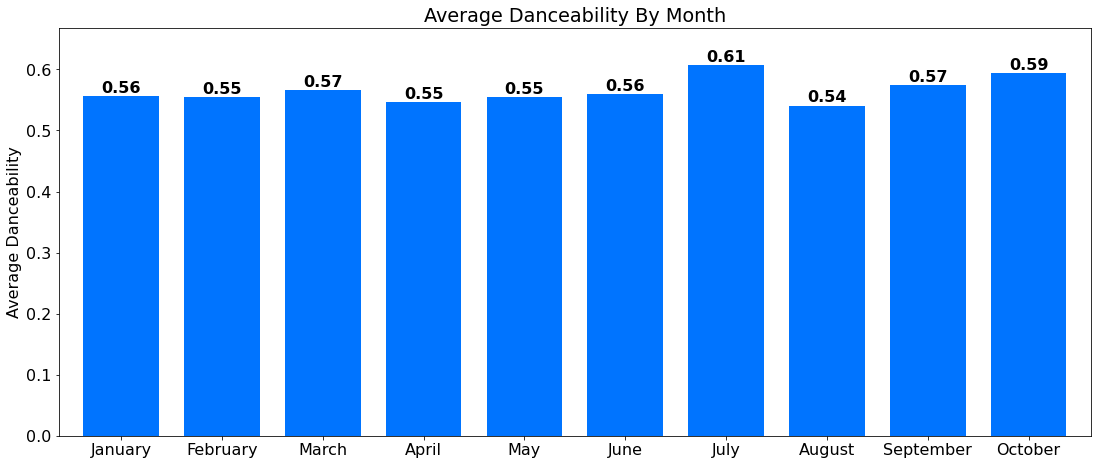

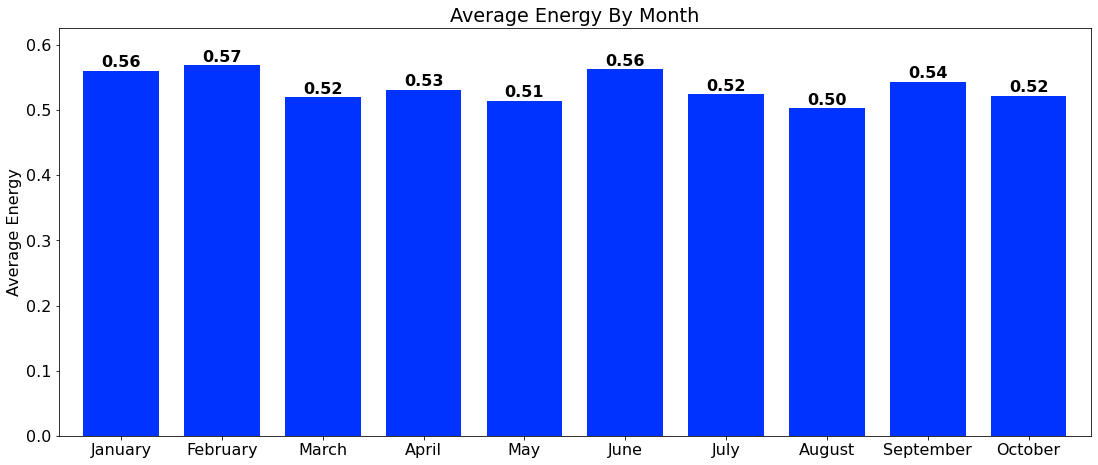

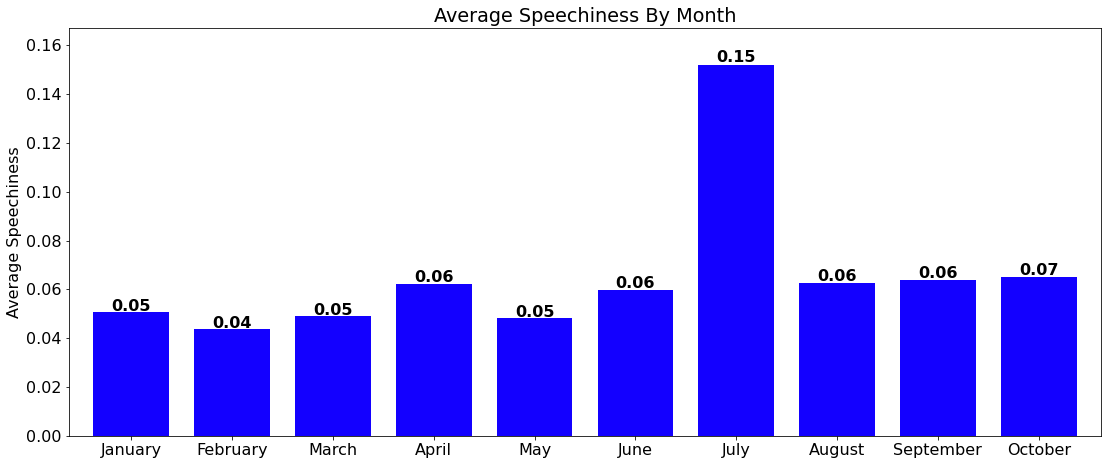

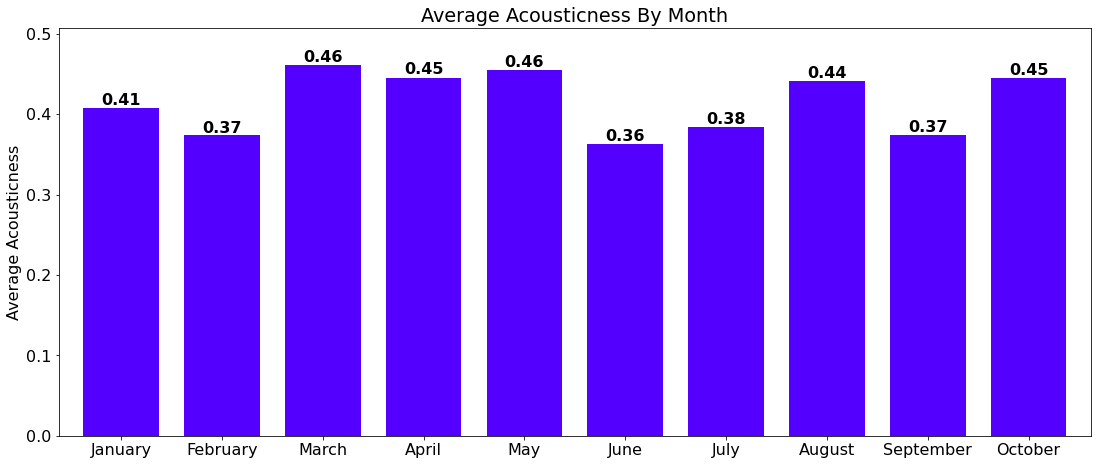

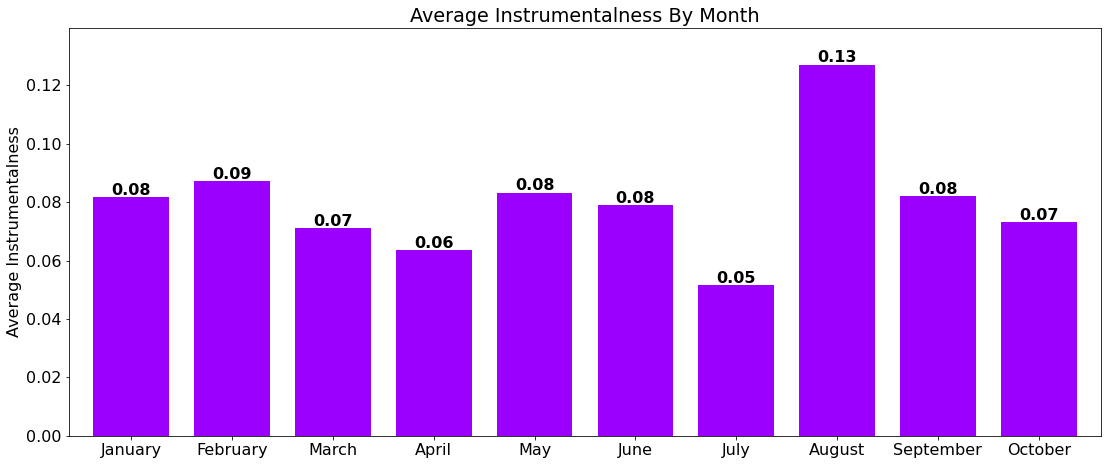

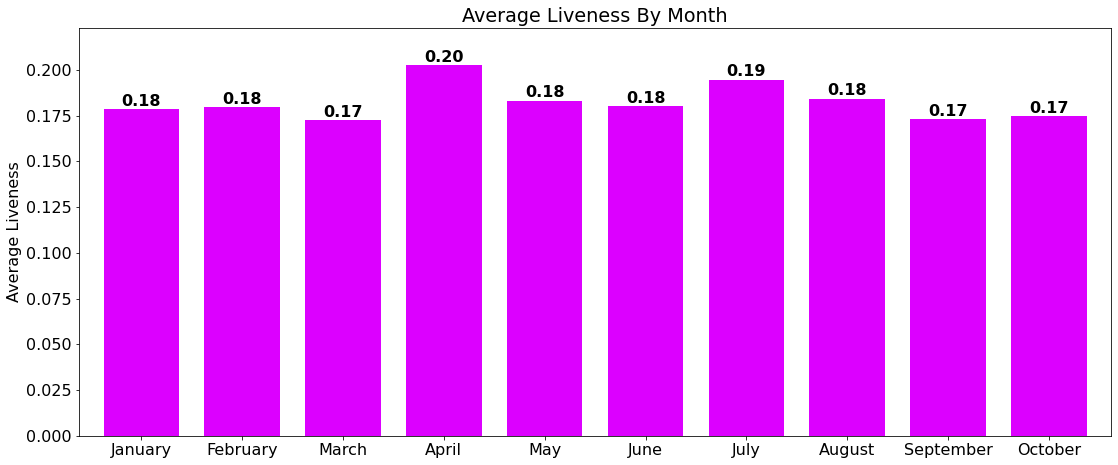

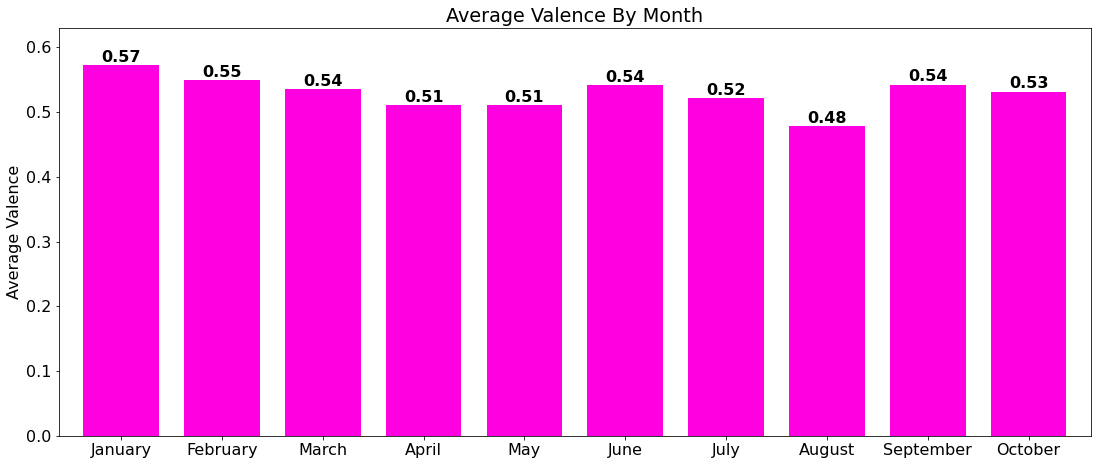

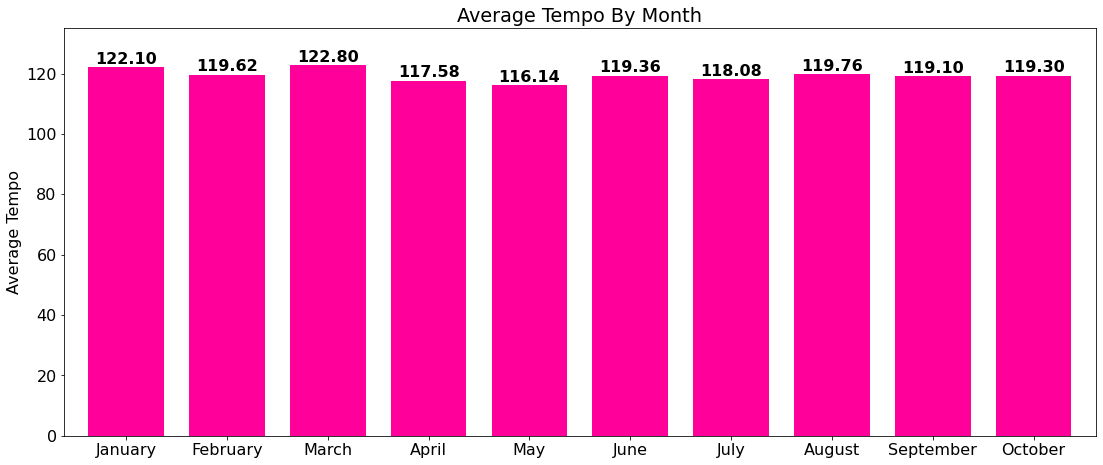

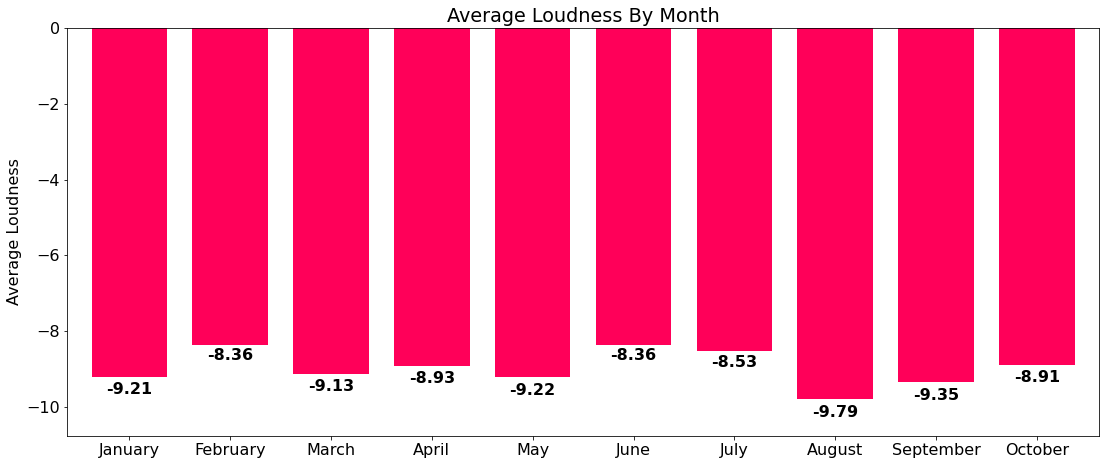

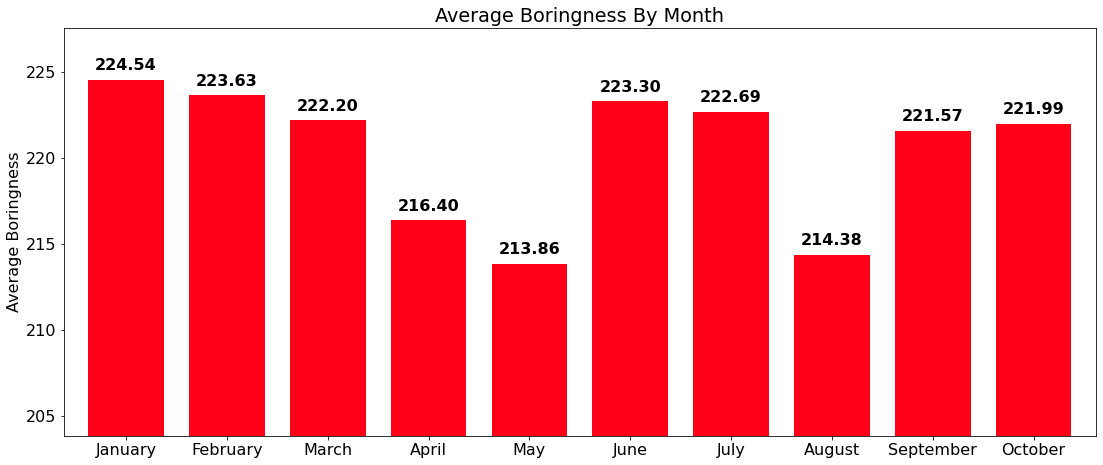

In [14]:
def graph_features_by_month(feature, color):
    def show_feature_by_month(data):
        fig, ax = plt.subplots()
        width = 0.75 # the width of the bars 
        ax.bar(data[:,0], data[:,1], width, color=color)
        for i, dance in enumerate(data[:,1]):
            ax.text(i + 1, data[i,1] + (data[i,1] / ((100 if feature != "boringness" else 400) if feature != "loudness" else 20)), "{:.2f}".format(dance), color='black', fontweight='bold', ha="center")

        plt.title("Average {} By Month".format(feature[0].upper() + feature[1:]))
        plt.xticks(ticks=range(month_range[0], month_range[1] + 1), labels=months[:month_range[1]])
        plt.ylabel("Average {}".format(feature[0].upper() + feature[1:]))
        if feature == "boringness":
            plt.ylim([data[:,1].min()- 10, data[:,1].max() + 3])
        plt.margins(0.025, 0.1)

    data = trimmed_tracks_data_df[["month", "id"]].merge(track_feature_data_df[["id", feature]], on="id")
    data = data.drop(columns=["id"]).groupby(["month"]).mean()
    data = data.reset_index().to_numpy()
    show_feature_by_month(data)

    plt.show()

colors = cm.hsv(np.linspace(0.6, 1.0, len(graphable_features)))
for i, feature in enumerate(graphable_features):
    graph_features_by_month(feature, colors[i])

/home/jcroderman/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


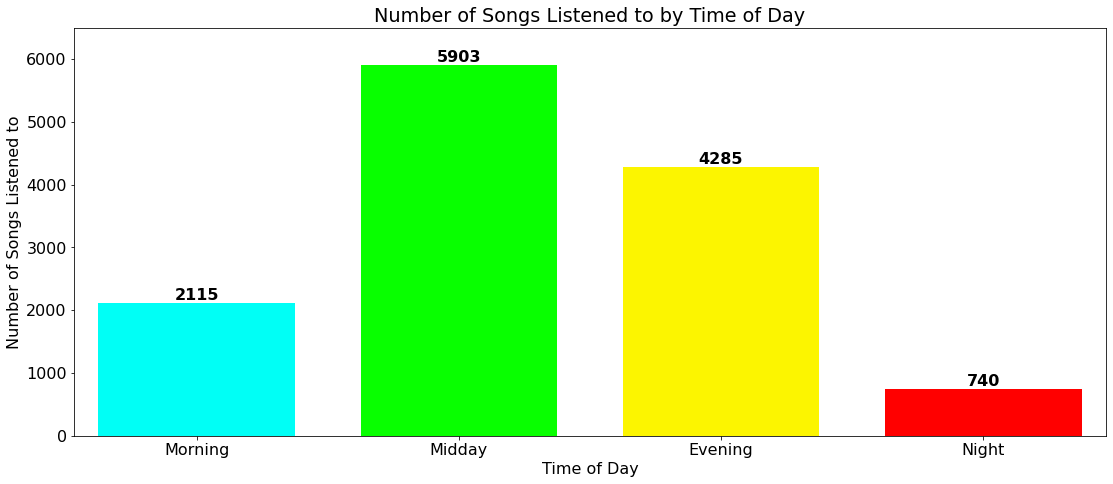

In [15]:
time_buckets = [
    "Morning", # [4:00AM, 10:00AM)
    "Midday", # [10:00AM, 4:00PM)
    "Evening", # [4:00PM, 10:00PM)
    "Night" # [10:00PM, 4:00AM)
]

def show_plays_by_time_of_day(data):
    fig, ax = plt.subplots()
    width = 0.75 # the width of the bars
    ax.bar(data[:,0], data[:,1], width, color=cm.hsv(np.linspace(0.5, 0, len(data))))
    for i, plays in enumerate(data[:,1]):
        ax.text(i, data[i,1] + 50, plays, color='black', fontweight='bold', horizontalalignment="center")
    
    plt.title("Number of Songs Listened to by Time of Day")
    plt.xticks(ticks=range(len(data)), labels=time_buckets)
    plt.xlabel("Time of Day")
    plt.ylabel("Number of Songs Listened to")
    plt.margins(0.025, 0.1)

def get_time_bucket(entry):
    hour = int(entry["time"][:2])
    if hour >= 4 and hour < 10:
        return 0
    elif hour >= 10 and hour < 16:
        return 1
    elif hour >= 16 and hour < 22:
        return 2
    return 3

tracks_time_of_day_df = trimmed_tracks_data_df[["time", "month", "id"]]
tracks_time_of_day_df["time_of_day"] = tracks_time_of_day_df.apply(get_time_bucket, axis=1)
data = tracks_time_of_day_df[["time_of_day", "id"]].groupby("time_of_day").count()
data = data.reset_index().to_numpy()
show_plays_by_time_of_day(data)

plt.show()

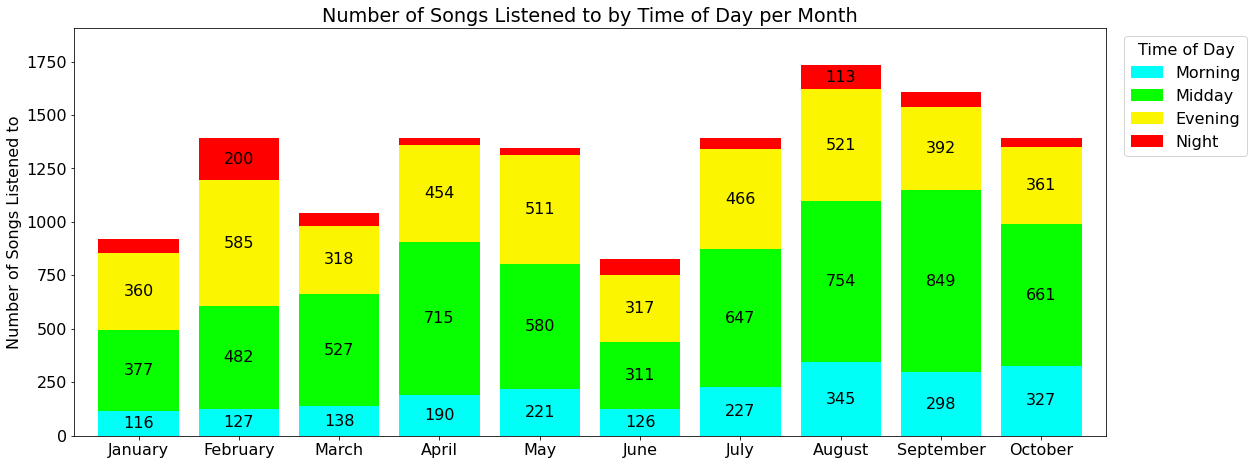

In [16]:
def show_plays_by_time_of_day_by_month(data):
    fig, ax = plt.subplots()

    bottom = (month_range[1] - month_range[0] + 1) * [0]
    color=cm.hsv(np.linspace(0.5, 0, len(time_buckets)))
    for time_of_day in range(len(time_buckets)):
        time_of_day_data = data[data["time_of_day"] == time_of_day].drop(columns=["time_of_day"], axis=1)
        for i in range(1, len(time_of_day_data) + 1):
            if time_of_day_data[time_of_day_data["month"] == i].shape[0] == 0:
                time_of_day_data = time_of_day_data.append({"month": i, "id": 0}, ignore_index=True)
        time_of_day_data = time_of_day_data.sort_values(by="month", ascending=True).to_numpy()
        for i, count in enumerate(time_of_day_data[:,1]):
            if count >= 80:
                ax.text(i + 1, bottom[i] + (time_of_day_data[i,1] / 2), count, color='black', horizontalalignment='center', verticalalignment='center')
        ax.bar(time_of_day_data[:,0], time_of_day_data[:,1], label=time_buckets[time_of_day], bottom=bottom, color=color[time_of_day])
        bottom = bottom + time_of_day_data[:,1]

    plt.title("Number of Songs Listened to by Time of Day per Month")
    plt.xticks(ticks=range(month_range[0], month_range[1] + 1), labels=months[:month_range[1]])
    plt.ylabel("Number of Songs Listened to")
    plt.legend(title="Time of Day", bbox_to_anchor=(1.01, 1))
    plt.margins(0.025, 0.1)

data = tracks_time_of_day_df[["month", "time_of_day", "id"]].groupby(["month", "time_of_day"]).count()
data = data.reset_index()
show_plays_by_time_of_day_by_month(data)

plt.show()

/home/jcroderman/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


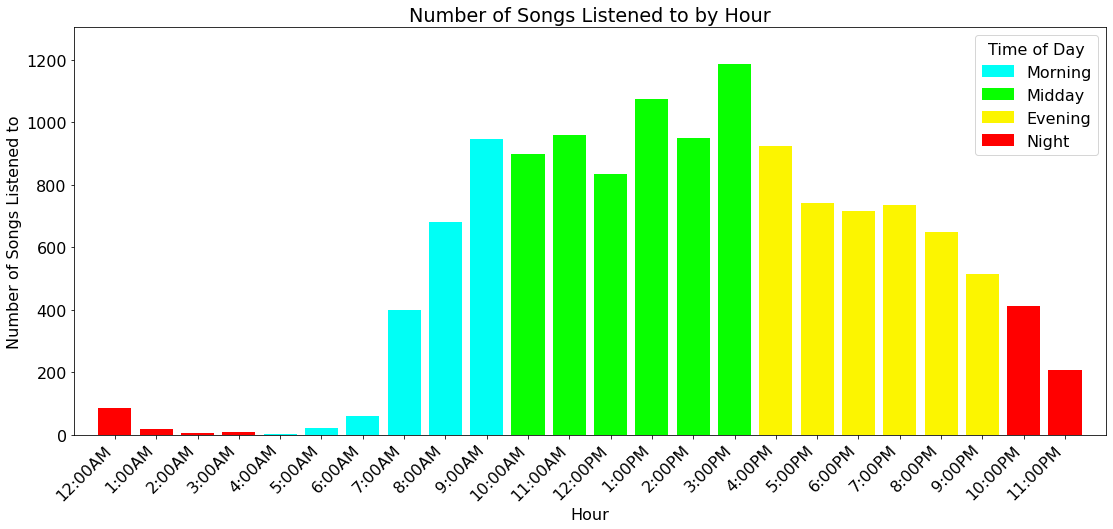

In [17]:
hours = ["12:00AM", "1:00AM", "2:00AM", "3:00AM", "4:00AM", "5:00AM", "6:00AM", "7:00AM", "8:00AM", "9:00AM", "10:00AM", "11:00AM",
         "12:00PM", "1:00PM", "2:00PM", "3:00PM", "4:00PM", "5:00PM", "6:00PM", "7:00PM", "8:00PM", "9:00PM", "10:00PM", "11:00PM"]

def show_plays_by_time_of_day_by_hour(data):
    fig, ax = plt.subplots()
    x = np.arange(0, len(time_buckets))
    color = cm.hsv(np.linspace(0.5, 0, len(time_buckets)))
    for time_of_day in range(len(time_buckets)):
        time_of_day_data = data[data["time_of_day"] == time_of_day].to_numpy()
        plt.bar(time_of_day_data[:,1], time_of_day_data[:,2], label=time_buckets[time_of_day], color=color[time_of_day])
    
    plt.title("Number of Songs Listened to by Hour")
    plt.xticks(ticks=range(len(hours)), labels=hours, rotation=45, ha='right')
    plt.xlabel("Hour")
    plt.ylabel("Number of Songs Listened to")
    plt.legend(title="Time of Day", loc=1)
    plt.margins(0.025, 0.1)

tracks_time_of_day_df["hour"] = tracks_time_of_day_df.apply(lambda entry: int(entry["time"][:2]), axis=1)
data = tracks_time_of_day_df[["time_of_day", "hour", "id"]].groupby(["time_of_day", "hour"]).count()
data = data.reset_index()
show_plays_by_time_of_day_by_hour(data)

plt.show()

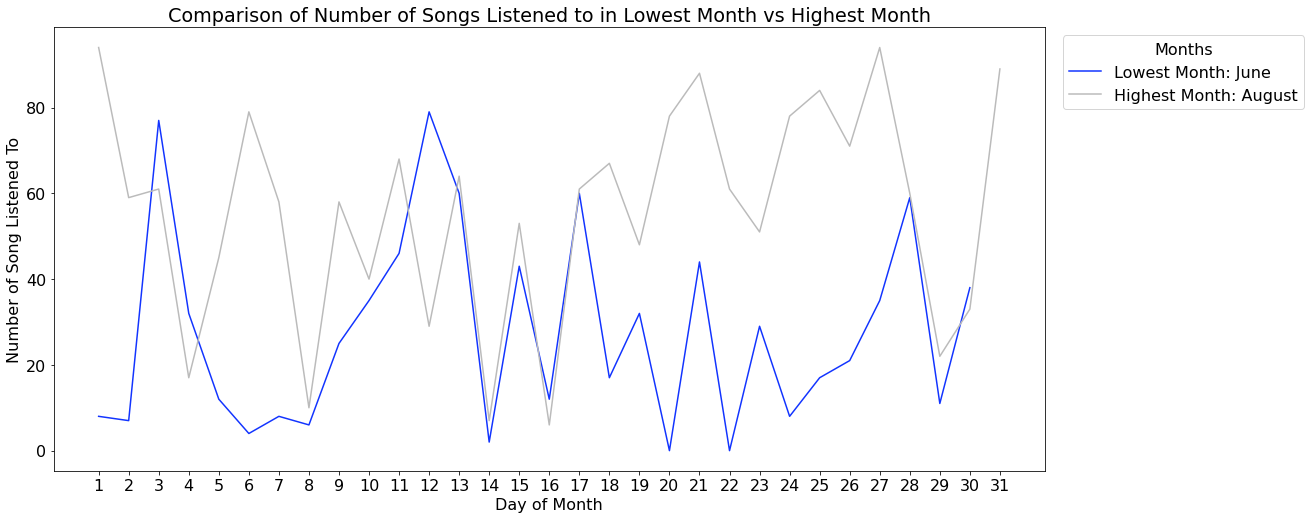

In [18]:
[lowest_month, highest_month] = [6, 8] # Could do this programatically

def show_extreme_month_plays(data):
    fig, ax = plt.subplots()
    for month in [lowest_month, highest_month]:
        is_lowest_month = month == lowest_month
        plays_data = data[data["month"] == month].drop(columns=["month"], axis=1).to_numpy()
        plt.plot(plays_data[:,0], plays_data[:,1], color="#1234ff" if is_lowest_month else "#bbbbbb",
                 label="{} Month: {}".format("Lowest" if is_lowest_month else "Highest", months[month - 1]))
    plt.title("Comparison of Number of Songs Listened to in Lowest Month vs Highest Month")
    plt.xticks(ticks=range(1, 32))
    plt.xlabel("Day of Month")
    plt.ylabel("Number of Song Listened To")
    plt.legend(title="Months", bbox_to_anchor=(1.01, 1))
    plt.tight_layout()

data = trimmed_tracks_data_df[trimmed_tracks_data_df["month"].isin([lowest_month, highest_month])][["id", "day", "month"]]
data = data.groupby(["month", "day"]).count().reset_index().rename({"id": "count"}, axis=1)
for month in [lowest_month, highest_month]:
    for day in range(1, 32):
        if month == 6 and day == 31: # Could make this more month specific
            pass
        elif data.loc[(data["month"] == month) & (data["day"] == day)].shape[0] == 0:
            data = data.append({"month": month, "day": day, "count": 0}, ignore_index=True)
data = data.sort_values(by=["month", "day"])
show_extreme_month_plays(data)

plt.show()

In [19]:
counts_per_day_df = trimmed_tracks_data_df[["date", "id"]].groupby("date").count().reset_index().rename({"id": "count"}, axis=1)
highest_day = counts_per_day_df.sort_values(by="count", ascending=False).iloc[0]
print("Most songs listened to in one day: {} with {} songs".format(highest_day["date"], highest_day["count"]))

Most songs listened to in one day: 2020-10-06 with 193 songs


In [20]:
if not "total_times_played" in full_track_data_df:
    full_track_data_df = trimmed_tracks_data_df[["id", "total_times_played"]].drop_duplicates().merge(full_track_data_df, on="id")
full_track_data_df.sort_values(by="total_times_played", ascending=False)[["total_times_played", "name", "artist_names", "album_name"]].head(10).reset_index(drop=True)

,total_times_played,name,artist_names,album_name
0,47,Unlovely (feat. Darlingside),"['The Ballroom Thieves', 'Darlingside']",Unlovely
1,45,Little Too Late,['Nicki Bluhm and the Gramblers'],Nicki Bluhm and The Gramblers
2,45,Tenebrist,['The Ballroom Thieves'],Unlovely
3,43,Don't Wanna Dance,['The Ballroom Thieves'],Unlovely
4,42,Love Is Easy,['The Ballroom Thieves'],Unlovely
5,38,Vanity Trip,['The Ballroom Thieves'],Unlovely
6,38,"Hey, Runner!",['The Arcadian Wild'],Finch In The Pantry
7,37,Eden,['Amanda Anne Platt & the Honeycutters'],Amanda Anne Platt & The Honeycutters
8,37,I Hope I'm Stoned (When Jesus Takes Me Home) [...,"['Charlie Worsham', 'Old Crow Medicine Show']",I Hope I'm Stoned (When Jesus Takes Me Home) [...
9,36,Roll the Bones,['The Ballroom Thieves'],Unlovely


## More will come soon!